In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Custom functions
import FockSystem.FockSystem as fst


# Constructing operator sequences

## Defining sequences

<span style="font-size:20px; font-weight:bold;">From Ints and Lists</span>


In [3]:
fst.OperSequence(0)

 $c^{†}_{0,↓}$

In [4]:
fst.OperSequence(1)

 $c_{0,↓}$

In [5]:
fst.OperSequence(1,2)

 $c_{0,↓}$ $+$ $c^{†}_{0,↑}$

In [6]:
fst.OperSequence([0,1],[1,2])

 $c^{†}_{0,↓}$$c_{0,↓}$ $+$ $c_{0,↓}$$c^{†}_{0,↑}$

<span style="font-size:20px; font-weight:bold;">From Tuples</span>


In [7]:
fst.OperSequence((('c',0,'up'),('c',1,'down')), ('c',0,'down'), ('a',2,'up'))

 $c^{†}_{0,↑}$$c^{†}_{1,↓}$ $+$ $c^{†}_{0,↓}$ $+$ $c_{2,↑}$

<span style="font-size:20px; font-weight:bold;">From Strings</span>


In [8]:
## Following OpenFermions convention, strings will be parsed in a (somewhat) similar manner
## Mismatch for now is that 'site 1' is displayed automatically as site 0 spin-up, rather than freely allowing for interpretation of 'site 1'

In [9]:
fst.OperSequence('0^,1', '1^,0,2^')

 $c^{†}_{0,↓}$$c_{0,↑}$ $+$ $c^{†}_{0,↑}$$c_{0,↓}$$c^{†}_{1,↓}$

## Assigning weights

In [10]:
## The weights of operator sequences can be set in many ways

In [11]:
c_down = fst.OperSequence(0, weights = [1j])
c_up = fst.OperSequence(2, weights = [5])
op = c_down + c_up
op

 j$c^{†}_{0,↓}$ $+$ 5$c^{†}_{0,↑}$

In [12]:
## A OperSequence instance can be used to set the weight of that subsequence in a longer sequence

In [13]:
op = c_down + c_up
op[c_up] = 10
op[c_down] = 20
op

 20$c^{†}_{0,↓}$ $+$ 10$c^{†}_{0,↑}$

<span style="font-size:20px; font-weight:bold;">Shorthand codes</span>


In [14]:
## The 'greater than' operator has additionally been reserved to quickly assign values

In [15]:
## Passing a single value assigns the same value to each subsequence
op > 3
op

 3$c^{†}_{0,↓}$ $+$ 3$c^{†}_{0,↑}$

In [16]:
## Passing an array assigns the values in order
op > [5,2]

 5$c^{†}_{0,↓}$ $+$ 2$c^{†}_{0,↑}$

# Supported Operator methods

## Basic operations

<span style="font-size:20px; font-weight:bold;">Addition and Subtraction</span>


In [17]:
c_down = fst.OperSequence(0)
c_up = fst.OperSequence(2)

In [18]:
c_up + c_down

 $c^{†}_{0,↑}$ $+$ $c^{†}_{0,↓}$

In [19]:
c_up - c_down + (~c_up) + 10

 $c^{†}_{0,↑}$ $-$ $c^{†}_{0,↓}$ $+$ $c_{0,↑}$ $+$ 10

<span style="font-size:20px; font-weight:bold;">Multiplication and Division</span>


In [20]:
4*c_down*c_up

 4$c^{†}_{0,↓}$$c^{†}_{0,↑}$

In [21]:
## Normal ordering is automatically applied for multiplication
4*c_up*c_down

 $-$ 4$c^{†}_{0,↓}$$c^{†}_{0,↑}$

<span style="font-size:20px; font-weight:bold;">Exponentation</span>


In [22]:
## Creating an operator t from some paper that should give t**4 = -1
an, cr, up, dwn = "a", "c", "u", "d"
weights = [1j, -1, 1, -1, 1j, -1j]
operators = [
    ((an, 0, up),(cr, 0, up), (an, 0, dwn)),
    ((an, 0, dwn), (cr, 0, dwn),(cr, 0, up)),
    (an, 0, up),
    ((an, 0, dwn),(cr, 0, dwn), (an, 0, up)),
    (cr, 0, dwn),
    ((an, 0, up),(cr, 0, up), (cr, 0, dwn)),
]
t = fst.OperSequence(*operators, weights=weights)

In [23]:
t

 j$c_{0,↑}$$c^{†}_{0,↑}$$c_{0,↓}$ $-$ $c_{0,↓}$$c^{†}_{0,↓}$$c^{†}_{0,↑}$ $+$ $c_{0,↑}$ $-$ $c_{0,↓}$$c^{†}_{0,↓}$$c_{0,↑}$ $+$ j$c^{†}_{0,↓}$ $-$ j$c_{0,↑}$$c^{†}_{0,↑}$$c^{†}_{0,↓}$

In [24]:
t**2

 $-$ j$c^{†}_{0,↑}$$c_{0,↓}$ $+$ j$c_{0,↓}$$c_{0,↑}$ $-$ j$c^{†}_{0,↓}$$c^{†}_{0,↑}$ $-$ j$c^{†}_{0,↓}$$c_{0,↑}$

In [25]:
t**3

 $-$ j$c^{†}_{0,↑}$$c_{0,↓}$$c_{0,↑}$ $+$ $c_{0,↑}$ $+$ $c^{†}_{0,↓}$$c^{†}_{0,↑}$$c_{0,↓}$ $-$ j$c^{†}_{0,↓}$$c^{†}_{0,↑}$$c_{0,↑}$ $-$ $c^{†}_{0,↓}$$c_{0,↓}$$c_{0,↑}$ $+$ j$c^{†}_{0,↓}$

In [26]:
t**4

 (-1+0j)

## Additional Operations

<span style="font-size:20px; font-weight:bold;">Site shifting</span>


In [27]:
## The lshift and rshift operators will shift the entire sequence by the specified numbers of site

In [28]:
c_down_0 = fst.OperSequence(0, 8)
c_down_0 >> 6

 $c^{†}_{6,↓}$ $+$ $c^{†}_{8,↓}$

In [29]:
c_down_5 = fst.OperSequence(('c',5,'dwn'), ('c',9,'up'))
c_down_5 << 4

 $c^{†}_{1,↓}$ $+$ $c^{†}_{5,↑}$

<span style="font-size:20px; font-weight:bold;">Conjugation</span>


In [30]:
arbitrary_sequence = fst.OperSequence([0,1],[4,12],[3,11],[5,6,7])
arbitrary_sequence

 $c^{†}_{0,↓}$$c_{0,↓}$ $+$ $c^{†}_{1,↓}$$c^{†}_{3,↓}$ $+$ $c_{0,↑}$$c_{2,↑}$ $+$ $c_{1,↓}$$c^{†}_{1,↑}$$c_{1,↑}$

In [31]:
## Arbitraty sequence conjugated:
~arbitrary_sequence

 $c^{†}_{0,↓}$$c_{0,↓}$ $+$ $c_{3,↓}$$c_{1,↓}$ $+$ $c^{†}_{2,↑}$$c^{†}_{0,↑}$ $+$ $c^{†}_{1,↑}$$c_{1,↑}$$c^{†}_{1,↓}$

<span style="font-size:20px; font-weight:bold;">Normal Ordering</span>


In [32]:
## Create example
example_seq = fst.OperSequence([1,0],[5,6,7])
example_seq

 $c_{0,↓}$$c^{†}_{0,↓}$ $+$ $c_{1,↓}$$c^{†}_{1,↑}$$c_{1,↑}$

In [33]:
## Normal order the example
example_seq.normal_order()
example_seq

 $-$ $c^{†}_{1,↑}$$c_{1,↓}$$c_{1,↑}$ $-$ $c^{†}_{0,↓}$$c_{0,↓}$ $+$ 1

# Connecting to Fock states

In [34]:
## The Fock State Class is interpreted by the OperSequence class to generate the data that represents a Hamiltonian

In [35]:
## Create by passing int (number of Fermionic sites)
basis = fst.FockStates(3)
basis

Fock basis with 64 states<br> |0,0,0〉+ |↓,0,0〉+ |↑,0,0〉+ |↓↑,0,0〉+ |0,↓,0〉$\cdots$ + |↓↑,↑,↓↑〉+ |0,↓↑,↓↑〉+ |↓,↓↑,↓↑〉+ |↑,↓↑,↓↑〉+ |↓↑,↓↑,↓↑〉

In [36]:
## Create by passing array of ints
basis = fst.FockStates([0,1,2,5,8])
basis

Fock basis with 5 states<br> |0,0〉+ |↓,0〉+ |↑,0〉+ |↓,↓〉+ |0,↑〉

<span style="font-size:20px; font-weight:bold;">Restricting the Fock Space</span>


In [37]:
basis = fst.FockStates(3)
even_states = basis.restrict(parity='even')
even_states

Fock basis with 32 states<br> |0,0,0〉+ |↓↑,0,0〉+ |↓,↓,0〉+ |↑,↓,0〉+ |↓,↑,0〉+ |↑,↑,0〉+ |0,↓↑,0〉+ |↓↑,↓↑,0〉+ |↓,0,↓〉+ |↑,0,↓〉+ |0,↓,↓〉+ |↓↑,↓,↓〉+ |0,↑,↓〉+ |↓↑,↑,↓〉+ |↓,↓↑,↓〉+ |↑,↓↑,↓〉+ |↓,0,↑〉+ |↑,0,↑〉+ |0,↓,↑〉+ |↓↑,↓,↑〉+ |0,↑,↑〉+ |↓↑,↑,↑〉+ |↓,↓↑,↑〉+ |↑,↓↑,↑〉+ |0,0,↓↑〉+ |↓↑,0,↓↑〉+ |↓,↓,↓↑〉+ |↑,↓,↓↑〉+ |↓,↑,↓↑〉+ |↑,↑,↓↑〉+ |0,↓↑,↓↑〉+ |↓↑,↓↑,↓↑〉

In [38]:
basis = fst.FockStates(3)
only_spin_down = basis.restrict(Ez_inf=True,U_inf=True)
only_spin_down

Fock basis with 8 states<br> |0,0,0〉+ |↓,0,0〉+ |0,↓,0〉+ |↓,↓,0〉+ |0,0,↓〉+ |↓,0,↓〉+ |0,↓,↓〉+ |↓,↓,↓〉

<span style="font-size:20px; font-weight:bold;">Calculating Hamiltonian action on a basis</span>


In [39]:
## Define basic elements for convenience
c_down = fst.OperSequence(0)
c_up = fst.OperSequence(2)
a_up = ~c_up
a_down = ~c_down

## Construct basic Hamiltonian
H = c_down*a_down + 20*c_down*(c_down >>1) + 20*c_down*(a_down>>1)
H

 $c^{†}_{0,↓}$$c_{0,↓}$ $+$ 20$c^{†}_{0,↓}$$c^{†}_{1,↓}$ $+$ 20$c^{†}_{0,↓}$$c_{1,↓}$

In [40]:
## Define basis
basis = fst.FockStates(3)
only_spin_down_basis = basis.restrict(Ez_inf=True,U_inf=True)
only_spin_down_basis

Fock basis with 8 states<br> |0,0,0〉+ |↓,0,0〉+ |0,↓,0〉+ |↓,↓,0〉+ |0,0,↓〉+ |↓,0,↓〉+ |0,↓,↓〉+ |↓,↓,↓〉

In [41]:
H_data = H[only_spin_down_basis]
H_as_array = H_data.to_array()
H_sparse = H_data.to_sparse_coo()
H_as_array

array([[ 0.+0.j,  0.+0.j,  0.+0.j, 20.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+0.j, 20.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j, 20.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [20.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        20.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, 20.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, 20.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, 20.+0.j,  0.+0.j,  0.+0.j,
         1.+0.j]])

<span style="font-size:20px; font-weight:bold;">Block diagonalization</span>


In [42]:
## The function .to_block_diagonal_basis() is provided to return a new FockStates instance that has been ordered to be block diagonal in the coupled OperSequence

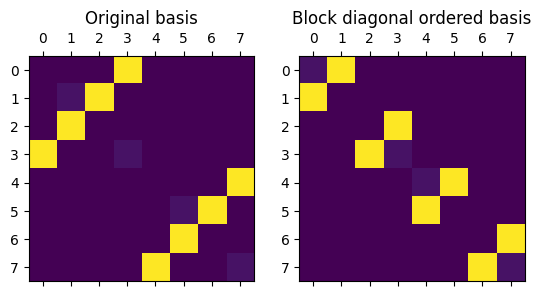

In [43]:
bd_basis = H[only_spin_down_basis].to_block_diagonal_basis()
fig,axs = plt.subplots(ncols = 2)
axs[0].set_title("Original basis")
axs[0].matshow(np.real(H[only_spin_down].to_array()))
axs[1].set_title("Block diagonal ordered basis")
axs[1].matshow(np.real(H[bd_basis].to_array()))

<span style="font-size:20px; font-weight:bold;">Matrix-Vector Multiplication</span>


In [44]:
random_vector = np.array([np.random.randint(10) for _ in  range(len(only_spin_down_basis.states))], dtype=complex)

## The @ symbol implements matrix-vecotr multipliction of OperSequence in a selected basis
print("Direct matrix-vector product")
result = H[only_spin_down] @ random_vector
print(np.array(result))

## This is identical to converting first to an array and handling the matrix-vector product there
## The direct method becomes faster and less memory-intesive for larger systems (N > 5)
array = H[only_spin_down_basis].to_array()
print("Normal matrix-vector product")
result = array @ random_vector
print(result)

Direct matrix-vector product
[180.+0.j 123.+0.j  60.+0.j 149.+0.j 100.+0.j  88.+0.j 160.+0.j 125.+0.j]
Normal matrix-vector product
[180.+0.j 123.+0.j  60.+0.j 149.+0.j 100.+0.j  88.+0.j 160.+0.j 125.+0.j]


# Minimal Example - The effective kitaev chain


<span style="font-size:20px; font-weight:bold;">Constructing the Hamiltonian from scratch</span>


In [45]:
## Define basic elements for convenience
c_down = fst.OperSequence(0)
c_up = fst.OperSequence(2)
a_up = ~c_up
a_down = ~c_down

In [46]:
## Build the Hamiltonian
## By building from subsequences, the value of individual terms can be easily accessed later
N = 3

ECT,MU,CAR = fst.OperSequence(),fst.OperSequence(),fst.OperSequence()

## Add ECT terms
for i in range(N-1):
    ECT += ((c_down*(a_down>>1))>>i)
    ## Optional: define a symbolic representation (stored outside Object in external .json)
    ECT[-1].set_symbolic(['$t_{\u2193\u2193}^{' + f'{i}' + '}$'])
    
## Add CAR terms
for i in range(N-1):
    CAR+= ((c_down*(c_down>>1))>>i)
    ## Optional: define a symbolic representation (stored outside Object in external .json)
    CAR[-1].set_symbolic(['$\u0394_{\u2193\u2193}^{' + f'{i}' + '}$'])

## Add mu terms
for i in range(N):
    MU += ((c_down*(a_down))>>i)
    ## Optional: define a symbolic representation(stored outside Object in external .json)
    MU[-1].set_symbolic(['$\u03BC_{' +f'{i}'+'}$'])

H = MU + CAR +ECT
H

 $c^{†}_{0,↓}$$c_{0,↓}$ $+$ $c^{†}_{1,↓}$$c_{1,↓}$ $+$ $c^{†}_{2,↓}$$c_{2,↓}$ $+$ $c^{†}_{0,↓}$$c^{†}_{1,↓}$ $+$ $c^{†}_{1,↓}$$c^{†}_{2,↓}$ $+$ $c^{†}_{0,↓}$$c_{1,↓}$ $+$ $c^{†}_{1,↓}$$c_{2,↓}$

In [47]:
H.symbolic()

$μ_{0}$$c^{†}_{0,↓}$$c_{0,↓}$ + $μ_{1}$$c^{†}_{1,↓}$$c_{1,↓}$ + $μ_{2}$$c^{†}_{2,↓}$$c_{2,↓}$ + $Δ_{↓↓}^{0}$$c^{†}_{0,↓}$$c^{†}_{1,↓}$ + $Δ_{↓↓}^{1}$$c^{†}_{1,↓}$$c^{†}_{2,↓}$ + $t_{↓↓}^{0}$$c^{†}_{0,↓}$$c_{1,↓}$ + $t_{↓↓}^{1}$$c^{†}_{1,↓}$$c_{2,↓}$

In [48]:
## Define a basis
basis = fst.FockStates(N)
basis = basis.restrict(Ez_inf=True,U_inf=True)

In [49]:
## Optional: Split basis into odd and even and restrict to inf U and inf Ez (i.e., exclude double occupation and spin-up occupation states)
even_basis = basis.restrict('even',Ez_inf=True,U_inf=True)
even_array = H[even_basis].to_array()
odd_basis = basis.restrict('odd',Ez_inf=True,U_inf=True)
odd_array = H[odd_basis].to_array()

<span style="font-size:20px; font-weight:bold;">Phase diagrams</span>


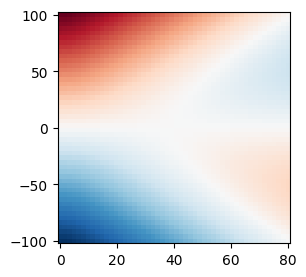

In [50]:
mu_range = np.linspace(-100,100,50)
t_range = np.linspace(0,80,50)

## Loop over range and get array, pass to linalg for eigenvalues
result = []
H[CAR] = 40
for mu in mu_range:
    H[MU] = mu
    for t in t_range:
        H[ECT] = t
        E_odd,phi_odd = np.linalg.eigh(H[odd_basis].data_array, UPLO="U")
        E_even,phi_even = np.linalg.eigh(H[even_basis].data_array,  UPLO="U")
        result.append(E_odd[0]-E_even[0])

result = np.reshape(result,( t_range.shape[0],mu_range.shape[0],))
vmin = -np.max(np.abs(result))
vmax = -vmin

fig,ax = plt.subplots(ncols=1, figsize = (3,3))
ax.pcolormesh(t_range,mu_range,result, cmap='RdBu_r', vmin = vmin, vmax=vmax)

<span style="font-size:20px; font-weight:bold;">Pre-defined functions</span>


In [51]:
import Analysis.transport_tools as tu
from Analysis.systems import kitaev_chain

In [52]:
N=2
MU,CAR,ECT = kitaev_chain(N)
H = MU + CAR +ECT
basis = fst.FockStates(N)
even_basis = basis.restrict('even',Ez_inf=True,U_inf=True)
odd_basis = basis.restrict('odd',Ez_inf=True,U_inf=True)

H[CAR] = 20
H[ECT] = 30

In [53]:
H

 $c^{†}_{0,↓}$$c_{0,↓}$ $+$ $c^{†}_{1,↓}$$c_{1,↓}$ $+$ 20$c^{†}_{0,↓}$$c_{1,↓}$ $+$ 30$c_{0,↓}$$c_{1,↓}$

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.35it/s]


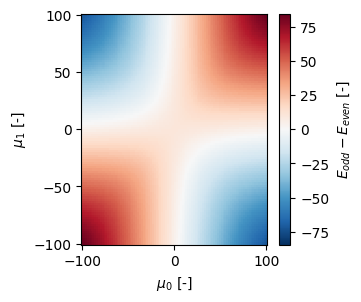

In [54]:
mu_range = np.linspace(-100,100,100)
t_range = np.linspace(0,80,100)

## Loop over range and get array, pass to linalg for eigenvalues
result = tu.phase_diagram(H,odd_basis,even_basis, MU[0], mu_range, MU[1], mu_range)

fig,ax = plt.subplots(ncols=1, figsize = (3,3))
result['E'].plot()

<span style="font-size:20px; font-weight:bold;">Lead Transitions</span>


In [55]:
N=4
MU,CAR,ECT = kitaev_chain(N)
H = MU + CAR +ECT

In [56]:
H[CAR] = 20
H[ECT] = 20

In [57]:
basis = fst.FockStates(N)
inf_Ez_basis = basis.restrict(Ez_inf=True,U_inf=True)
array = H[inf_Ez_basis].to_array()

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 408.41it/s]


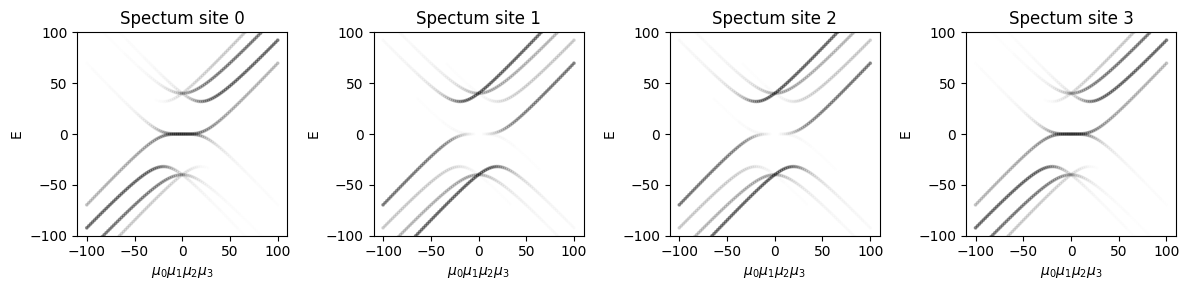

In [58]:
fig, axs = plt.subplots(ncols = N, figsize = (3*N,3))
for ax in axs:
    ax.set_ylim([-100,100])
    
tu.energy_spectrum(H, inf_Ez_basis, MU, np.linspace(-100,100,100), np.arange(N), fig,axs)

plt.tight_layout()

<span style="font-size:20px; font-weight:bold;">Conductance</span>


In [59]:
N = 3
MU,CAR,ECT = kitaev_chain(N)
H = MU + CAR +ECT

In [60]:
basis = fst.FockStates(N)
inf_Ez_basis = basis.restrict(Ez_inf=True,U_inf=True)
array = H[inf_Ez_basis].to_array()

In [61]:
H[CAR] = 20e-3
H[ECT] = 20e-3

In [62]:
lead_params = {"gammas": [0.001]*5, "kBT": 0.002, "dV": 0.001}
bias_range = np.linspace(-70e-3,70e-3, 100)
mu_range = np.linspace(-50e-3,50e-3,100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.02it/s]


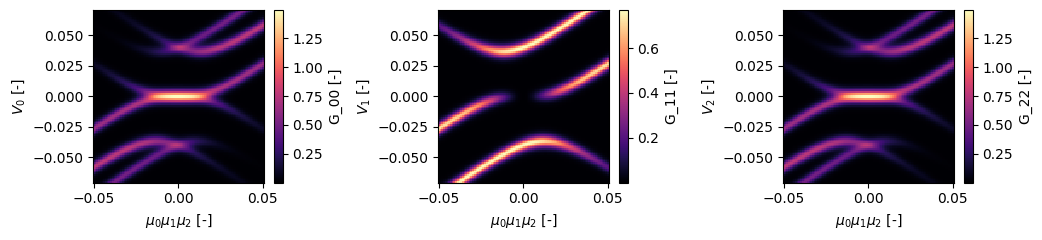

In [63]:
Gs = tu.conductance_spectrum(H,inf_Ez_basis,MU, mu_range, bias_range,sites = np.arange(N), lead_params = lead_params)

fig, axs = plt.subplots(ncols = N,figsize = (N*3.5,2.5))
for i in range(len(axs)):
    Gs[f'G_{i}{i}'].plot(ax =axs[i], cmap='magma')
plt.tight_layout()